# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#import folium
#from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

In [179]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp.head(5)

,Country,year,GDP
0,Afghanistan,1992,no data
1,Albania,1992,0.843
2,Algeria,1992,49.217
3,Andorra,1992,no data
4,Angola,1992,9.395


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

In [180]:
pivot_gdp = gdp.pivot(index='Country', columns='year', values='GDP')

In [181]:
pivot_gdp.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2782.318,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.07,25132.372,26465.873,26923.495,26648.687,...,52037.09,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,18.876,20.136,no data,no data,no data,no data,no data,no data,no data,no data
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.55,681.515,...,2540.86,2455.608,2746.799,2974.59,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904
Albania,0.843,1.461,2.361,2.882,3.2,2.259,2.56,3.209,3.483,3.928,...,15.399,15.161,18.31,18.509,20.177,20.847,21.932,23.086,24.217,25.46


In [182]:
pivot_gdp.replace('no data', np.nan, inplace=True)
pivot_gdp['NaN_count'] = pivot_gdp.isna().sum(axis=1)

In [183]:
# There is no country with no entries at all
pivot_gdp[pivot_gdp['NaN_count'] == 37]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,


In [184]:
# Alle Länder mit NaN count >= 9 werden rausgeschmissen (haben weniger als 75% der Daten über die Zeit gesehen)
gdp_clean = pivot_gdp[pivot_gdp['NaN_count'] < 9]

In [185]:
gdp_clean.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984,0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.07,25132.372,26465.873,26923.495,26648.687,...,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719,0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.55,681.515,...,2455.608,2746.799,2974.59,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904,0
Albania,0.843,1.461,2.361,2.882,3.2,2.259,2.56,3.209,3.483,3.928,...,15.161,18.31,18.509,20.177,20.847,21.932,23.086,24.217,25.46,0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,145.656,163.138,195.415,206.007,210.86,218.341,225.09,228.991,232.992,0


In [186]:
gdp_clean2 = gdp_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [187]:
final_gdp = gdp_clean2.fillna(gdp_clean2.rolling(5, min_periods=2, center=True, axis=1).mean())

In [188]:
final_gdp2 = final_gdp.interpolate(method='linear', axis=1, limit_direction='both')


In [189]:
final_gdp2.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984,0.0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.070,25132.372,26465.873,26923.495,26648.687,...,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719,0.0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.550,681.515,...,2455.608,2746.799,2974.590,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904,0.0
Albania,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,15.161,18.310,18.509,20.177,20.847,21.932,23.086,24.217,25.460,0.0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,145.656,163.138,195.415,206.007,210.860,218.341,225.090,228.991,232.992,0.0


In [190]:
#Short check if there a still NaN-Values
final_gdp2['NaN_count2'] = final_gdp2.isna().sum(axis=1)
final_gdp2[final_gdp2['NaN_count2'] > 0]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

In [191]:
#drop year in the future
final_gdp2.drop(columns=[2023,2024,2025,2026,2027,2028], axis=0, inplace=True)

In [192]:
final_gdp2.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2177.688,2285.138,2463.014,2631.963,2782.318,2610.812,2884.173,3133.939,0.0,0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.070,25132.372,26465.873,26923.495,26648.687,...,45449.127,46671.191,48687.936,51537.607,52037.090,51000.154,56628.973,57582.432,0.0,0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.550,681.515,...,2419.438,2301.875,2316.143,2479.852,2540.860,2455.608,2746.799,2974.590,0.0,0
Albania,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.509,0.0,0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,165.979,160.034,167.498,174.868,171.673,145.656,163.138,195.415,0.0,0


In [193]:
#generate list to go through and create a blacklist
final_gdp2.index.values.tolist()

['ASEAN-5',
 'Advanced economies',
 'Africa (Region)',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia and the Caucasus',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe ',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Emerging and Develo

In [194]:
blacklist = ['ASEAN-5', 'Advanced economies', 'Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Central America', 'Central Asia and the Caucasus',  'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies',  'Euro area', 'Europe', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)',  'Middle East (Region)', 'Middle East and Central Asia',  'North Africa', 'North America',  'Other advanced economies', 'Pacific Islands ',  'South America', 'South Asia', 'Southeast Asia',  'Sub-Saharan Africa (Region) ',  'Sub-Saharan Africa',  'West Bank and Gaza', 'Western Europe', 'Western Hemisphere (Region)', 'World']

In [195]:
final_gdp3 = final_gdp2.drop(blacklist)

# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [196]:
# Insert your code here.

#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [197]:
# Insert your code here.

# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [198]:
# Insert your code here.
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [199]:
df_supervised = pd.DataFrame.transpose(final_gdp3)
df_supervised = df_supervised.drop(["NaN_count", "NaN_count2"])
df_supervised_norm = (df_supervised - df_supervised.mean())/df_supervised.std()
df_supervised_norm[df_supervised_norm.isnull().any(axis=1)]

Country,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,


In [200]:
model_lin = LinearRegression(fit_intercept = True)
countrys = df_supervised_norm.columns.values

In [201]:
max_lag = 5
Results = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
  
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results.loc[len(Results)] = new_row

#model_fit mehrmals laufen lassen ?? Siehe Skript letzte Übung Bitcoins

In [202]:
Results = Results.groupby(["Country"]).agg('sum')

In [203]:
Results.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.011117,0.014210,0.007611,0.024529,0.036404
Algeria,0.081713,0.083712,0.046907,0.052259,0.128371
Andorra,0.041531,0.028305,0.077305,0.134768,0.046322
Angola,0.235800,0.240116,0.125731,0.153186,0.338172
Antigua and Barbuda,0.221158,0.224911,0.194753,0.193524,0.179940


In [204]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results["MSE_lag5"]))

Average MSE for 1 lag is:  0.09277597695663982
Average MSE for 2 lags is:  0.09783193305820274
Average MSE for 3 lags is:  0.06820496431817992
Average MSE for 4 lags is:  0.08190354399850885
Average MSE for 5 lags is:  0.11165447408767636


#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*

# Prepocessing CSV Files

In [205]:
# Insert your code here.
imports = pd.read_csv("TDS1/Importe.csv", sep=",")
exports = pd.read_csv("TDS1/Exporte.csv", sep=",")
population = pd.read_csv("TDS1/Populations.csv", sep = ",")
unemployment = pd.read_csv("TDS1/Arbeitslosenraten.csv", sep = ",")
nat_disasters = pd.read_csv("TDS1/natural-disasters.csv", sep = ",")

# Quellen noch rausschreiben

# Imports

In [206]:
imports.drop(imports.iloc[:, 1:36], inplace = True, axis = 1)
imports.drop(["Unnamed: 67"], inplace = True, axis = 1)
imports.rename(columns={'Country Name': 'Country'}, inplace=True)
imports.set_index(keys='Country', inplace=True)

In [207]:
# Investigate NaN
imports['NaN_count'] = imports.isna().sum(axis=1)

In [208]:
# Drop all rows with >= 9 NaN
imports_clean = imports[imports['NaN_count'] < 9]

In [209]:
imports_clean.drop(['NaN_count'], axis=1, inplace=True)
imports_clean = imports_clean.fillna(imports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
imports_clean = imports_clean.interpolate(method='linear', axis=1, limit_direction='both')

C:\Users\Alina\AppData\Local\Temp\ipykernel_10364\1395835386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean.drop(['NaN_count'], axis=1, inplace=True)


# Exports

In [210]:
exports.drop(exports.iloc[:, 1:36], inplace = True, axis = 1)
exports.drop(["Unnamed: 67"], inplace = True, axis = 1)
exports.rename(columns={'Country Name': 'Country'}, inplace=True)
exports.set_index(keys='Country', inplace=True)

In [211]:
# Investigate NaN
exports['NaN_count'] = exports.isna().sum(axis=1)

In [212]:
# Drop all rows with >= 9 NaN
exports_clean = exports[exports['NaN_count'] < 9]

In [213]:
exports_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_10364\3056136356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_clean.drop(['NaN_count'], axis=1, inplace=True)


In [214]:
exports_clean = exports_clean.fillna(exports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
exports_clean = exports_clean.interpolate(method='linear', axis=1, limit_direction='both')

# Population

In [215]:
population.drop(population.iloc[:, 1:36], inplace = True, axis = 1)
population.drop(["Unnamed: 67"], inplace = True, axis = 1)
population.rename(columns={'Country Name': 'Country'}, inplace=True)
population.set_index(keys='Country', inplace=True)

In [216]:
# Investigate NaN - No NaN values in the dataset
population['NaN_count'] = population.isna().sum(axis=1)


In [217]:
population = population.drop(columns=["NaN_count"])

# Unemployment

In [218]:
unemployment.drop(unemployment.iloc[:, 1:5], inplace = True, axis = 1)
unemployment.drop(["Flag Codes"], inplace = True, axis = 1)
unemployment_piv = unemployment.pivot(index='LOCATION', columns='TIME', values='Value')

In [219]:
unemployment_piv
# hat nur 35 verwertbare Länder - evtl. am Ende nutzen und Einfluss auf Regression für diese 35 Länder messen

TIME,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,10.728140,10.874670,9.722190,8.472281,8.506114,8.362488,7.677429,6.873791,6.285546,6.742173,...,5.661940,6.077244,6.056423,5.710809,5.595881,5.307670,5.166878,6.463281,5.113611,3.705759
AUT,NaN,3.958333,4.241667,4.241667,4.733333,4.733333,4.725000,4.150000,3.933333,3.983333,...,5.725000,6.033333,6.150000,6.450000,5.925000,5.208333,4.841667,6.025000,6.200000,4.758333
BEL,7.091667,8.625000,9.750000,9.675000,9.541667,9.216666,9.341666,8.400000,6.875000,6.591667,...,8.550000,8.658334,8.650000,7.850000,7.100000,5.958333,5.366667,5.541667,6.275000,5.575000
CAN,11.191670,11.400000,10.416670,9.508333,9.608334,9.116667,8.283334,7.591667,6.816667,7.216667,...,7.150000,7.033333,6.941667,7.025000,6.425000,5.841667,5.691667,9.691667,7.541667,5.300000
CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.747292,4.829988,4.800639,4.919180,4.797587,4.714414,4.394452,4.815328,5.098192,4.299916
CHL,6.665000,6.542500,7.815000,7.302500,6.325000,6.115000,6.395000,10.137500,9.667500,9.852500,...,6.082220,6.495096,6.328377,6.684913,6.965175,7.376639,7.222640,10.770240,8.861450,7.878028
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.742500,9.205000,8.950833,9.226666,9.295834,9.529166,10.370830,15.864170,13.810830,11.218330
CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.386163,9.617385,9.612973,9.537852,9.071724,10.264050,11.755390,19.606880,16.433370,12.218830
CZE,NaN,4.308333,4.291667,4.008333,3.891667,4.775000,6.466667,8.700000,8.775000,8.125000,...,6.966667,6.116667,5.058333,3.966667,2.908333,2.266667,2.016667,2.550000,2.808333,2.400000


# Natural disasters

In [220]:
nat_disasters = nat_disasters[["Country name", "Year", "Number of total people affected by drought"]]
nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)
nat_dis_piv = nat_disasters.pivot(index='Country', columns='Year', values='Number of total people affected by drought')


In [221]:
nat_dis_piv.drop(nat_dis_piv.iloc[:, 0:92], inplace = True, axis = 1)

# Wenn NaN Eintragung dann bedeutet das, dass keine Naturkatastrophe stattgefunden hat, wir ersetzen mit "0 Betroffenen" damit wir die Variable als numerischen Regressor benutzen können
# oder alternativ könnten wir es auch noch in eine kategorische Dummy variable umwandeln
nat_dis_piv.fillna(0, inplace=True)

In [222]:
nat_dis_piv.head(3)

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13500000.0,0.0,0.0,11000000.0,0.0
Africa,7000000.0,2346507.0,1200000.0,1811994.0,4942000.0,1477100.0,236700.0,36019545.0,231290.0,13054558.0,...,5080000.0,6795326.0,30331228.0,11641000.0,16561874.0,1226600.0,6983000.0,21526000.0,34062500.0,31356261.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
# MATCH THE COUNTRY NAMES
# 1. Clean all new dataframes of the blacklist
# 1. Handle NaNs
# 2. Ensure that the column with the country names is called "country"
# 3. Standardize country names using fuzzywuzzy, a string matching library in python.
#    A warning is printed if the matched name has a similarity score below 80%, also we use copies of the original dataframes

from fuzzywuzzy import process

def match_countries(df, countries):
    df_copy = df.copy()
    matches = []
    for country in df_copy.index:
        match, score = process.extractOne(country, countries)
        if score < 90:
            continue
            #print(f"Low match score: {country} matched with {match} with score {score}")
        elif score < 99:
            print(f"Warning! Middle match score: {country} matched with {match} with score {score}")
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
        else:
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
    df_copy = df_copy[df_copy.index.isin(matches)]
    return df_copy

countries = final_gdp3.index.unique()

print("Importe:")
imp_clean_copy = match_countries(imports_clean, countries)
print("Exporte:")
exp_clean_copy = match_countries(exports_clean, countries)
print("Nat_Dis:")
nat_dis_clean_copy = match_countries(nat_dis_piv, countries)
print("Population:")
pop_clean_copy = match_countries(population, countries)
#df5_copy = match_countries(df5, countries)


Importe:


Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90
Warning! Middle match score: Caribbean small states matched with Caribbean with score 90
Warning! Middle match score: East Asia & Pacific (excluding high income) matched with East Asia with score 90
Warning! Middle match score: East Asia & Pacific matched with East Asia with score 90
Warning! Middle match score: Egypt, Arab Rep. matched with Egypt with score 90
Warning! Middle match score: Hong Kong SAR, China matched with Hong Kong SAR with score 90
Warning! Middle match score: St. Kitts and Nevis matched with Saint Kitts and Nevis with score 90
Warning! Middle match score: Korea, Rep. matched with Korea, Republic of with score 90
Warning! Middle match score: Latin America & Caribbean (excluding high income) matched with Caribbean with score 90
Warning! Middle match score: Latin America & Caribbean matched wit

In [224]:
final_gdp3 = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])

In [225]:
# Normalize the numerical data (Sollten wir in der a) dann auch noch machen!!!!)

imp_clean_copy_norm = (imp_clean_copy - imp_clean_copy.mean())/imp_clean_copy.std()
exp_clean_copy_norm = (exp_clean_copy - exp_clean_copy.mean())/exp_clean_copy.std()
nat_dis_clean_copy_norm = (nat_dis_clean_copy - nat_dis_clean_copy.mean())/nat_dis_clean_copy.std()
pop_clean_copy_norm = (pop_clean_copy - pop_clean_copy.mean())/pop_clean_copy.std()
final_gdp3_norm = (final_gdp3 - final_gdp3.mean())/final_gdp3.std()

In [226]:
#Ensure type of all Column Names is identical (integer)

imp_clean_copy_norm.columns = imp_clean_copy_norm.columns.astype(int)
exp_clean_copy_norm.columns = exp_clean_copy_norm.columns.astype(int)
nat_dis_clean_copy_norm.columns = nat_dis_clean_copy_norm.columns.astype(int)
pop_clean_copy_norm.columns = pop_clean_copy_norm.columns.astype(int)
final_gdp3_norm.columns = final_gdp3_norm.columns.astype(int)

In [227]:
#Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population"])

In [228]:
#swap the level of multiindexes
data = data.swaplevel(0,1)

In [229]:
countrys_mod = data.index.get_level_values(0).unique()

In [230]:
countrys_mod

Index(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=192)

In [231]:
max_lag = 5
Results_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
  
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        X = work_df.drop(columns=["GDP"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results_mod.loc[len(Results_mod)] = new_row

In [232]:
Results_mod = Results_mod.groupby(["Country"]).agg('sum')

In [233]:
Results_mod.head(2)

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.000036,0.000065,0.000011,0.000035,0.000012
Algeria,0.000033,0.000014,0.000009,0.000021,0.000013


In [234]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results_mod["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results_mod["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results_mod["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results_mod["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results_mod["MSE_lag5"]))

Average MSE for 1 lag is:  0.002431342267753905
Average MSE for 2 lags is:  0.0026927522151511843
Average MSE for 3 lags is:  0.0017351070812559029
Average MSE for 4 lags is:  0.005264594138916396
Average MSE for 5 lags is:  0.0013013618802844233


Ab hier können wir vermutlich alles löschen (oder?):


In [235]:
#categorical variables into dummy? 

In [236]:
imp_clean_copy_norm = imp_clean_copy_norm.add_prefix('Imp_')
exp_clean_copy_norm = exp_clean_copy_norm.add_prefix('Exp_')
nat_dis_clean_copy_norm = nat_dis_clean_copy_norm.add_prefix('Nat_Dis_')
pop_clean_copy_norm = pop_clean_copy_norm.add_prefix('Pop_')
#df5_scaled = df5_scaled.add_prefix('df5_')

In [237]:
#all_data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm], axis=1, keys=['GDP', 'Import', 'Export', 'Nat_Dis', 'Population'])
all_data = final_gdp3_norm.join([imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm], how='inner')

In [238]:
all_data.drop("Pop_NaN_count", axis = 1, inplace = True)

KeyError: "['Pop_NaN_count'] not found in axis"

In [ ]:
# perform the regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Loop over each country
for country in all_data.index.unique():
    mse_scores = []
    # Loop over each year from 1995 to the last year in your data
    for year in range(1998, 2023):  # Adjust this range according to your data
        # Get data for this country and years up to the current year
        country_data = all_data.loc[country]
        country_data = country_data[[i for i in country_data.columns if int(i.split('_')[-1]) <= year]]
        
        # Create lagged GDP and other variables
        for i in range(1, 4):
            country_data[f'{year}_lag{i}'] = country_data[str(year-i)]
            for df_name in ['Imp_', 'Exp_', 'Nat_Dis_', 'Pop_']:
                country_data[f'{year}_{df_name}lag{i}'] = country_data[df_name+str(year-i)]
        
        # Drop rows with missing values (due to lagging)
        country_data = country_data.dropna()
        
        # Define predictors and target variable
        X = country_data.drop([year], axis=1)
        y = country_data[year]
        
        # Split into training and testing sets
        X_train, X_test = X.iloc[:-1], X.iloc[-1:]
        y_train, y_test = y.iloc[:-1], y.iloc[-1:]
        
        # Fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    
    print(f'Average MSE for {country}: {np.mean(mse_scores)}')
        


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# Loop over each country
for country in all_data.index.unique():
    mse_scores = []
    # Loop over each year from 1995 to the last year in your data
    for year in range(1995, 2023):  # Adjust this range according to your data
        # Get data for this country and years up to the current year
        country_data = all_data.loc[country, : year]
        
        # Create lagged GDP and other variables
        for i in range(1, 4):
            country_data[f'{year}_lag{i}'] = country_data[year-i]
            for df_name in ['Imp_', 'Exp_', 'Nat_Dis_', 'Pop_']:
                country_data[f'{year}{df_name}lag{i}'] = country_data[df_name + str(year-i)]

In [ ]:
country_data.to_frame().T.to_csv("TDS1\Test")

In [ ]:
country_data.to_frame().T[2004]

Zambia   -0.235063
Name: 2004, dtype: float64

In [ ]:
country_data.to_frame().T["2022_lag3"]

Zambia   -0.226238
Name: 2022_lag3, dtype: float64

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [ ]:
#Package Import
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [239]:
#Give second index a name (to make it callable)
data.index = data.index.set_names("Kind", level = 1)

In [241]:
# Transform sturcture of data again to make it usable for kmeans
data_piv = data.pivot_table(index = "Country", columns = ["Kind"], aggfunc = sum)
data_piv = data_piv.dropna()
data_piv


In [250]:
#fit kmeans with different Ks to find best
distortions = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto")
    kmeans.fit(data_piv)
    distortions.append(kmeans.inertia_)

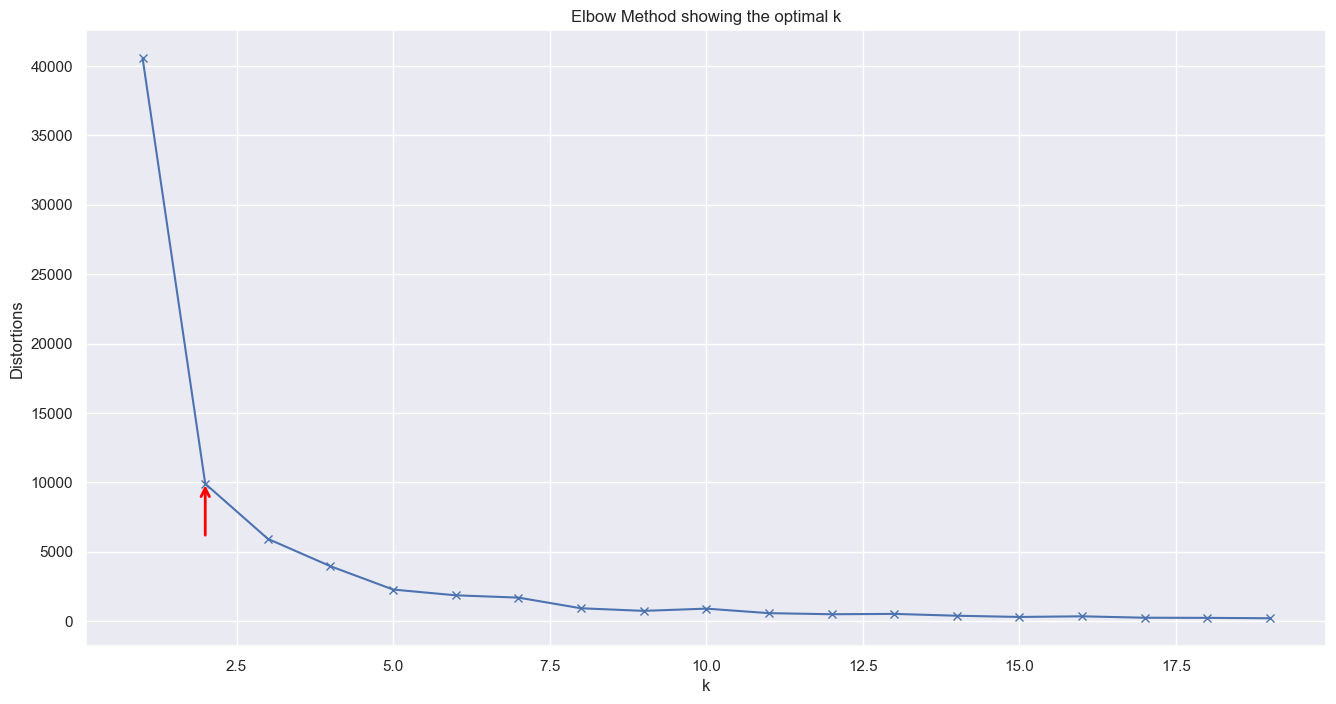

In [274]:
#Ellbow-Method --> Best Number of Clusters is 2
plt.figure(figsize = (16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (2,10000), xytext = (2,6000), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()


In [279]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_piv)
y_kmeans = kmeans.predict(data_piv)
y_kmeans

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [297]:
cluster_labels = kmeans.fit_predict(data_piv.values)
data_piv['cluster_label'] = cluster_labels

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alina\AppData\Local\Temp\ipykernel_10364\685216981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv['cluster_label'] = cluster_labels


In [298]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_piv.values)
data_piv["pca_1"] = reduced_features[:,0]
data_piv["pca_2"] = reduced_features[:,1]

C:\Users\Alina\AppData\Local\Temp\ipykernel_10364\3053276081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv["pca_1"] = reduced_features[:,0]
C:\Users\Alina\AppData\Local\Temp\ipykernel_10364\3053276081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv["pca_2"] = reduced_features[:,1]


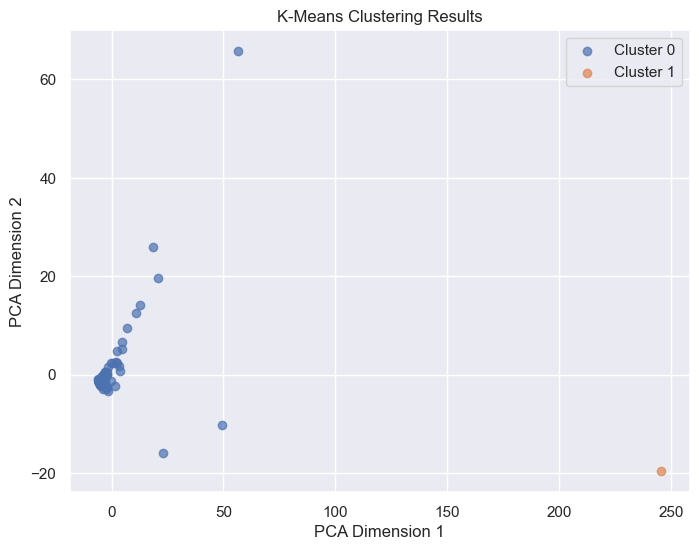

In [300]:
num_clusters=2
plt.figure(figsize=(8,6))
for cluster_label in range (num_clusters):
    plt.scatter(
        data_piv[data_piv['cluster_label'] == cluster_label]['pca_1'],
        data_piv[data_piv['cluster_label'] == cluster_label]['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha = 0.7
    )
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [ ]:
#Aus meiner Sicht haben wir da irgendwie ein Problem, oder? 
#Wenn zwei Cluster die beste Wahl sind aber alle außer einem Land blau sind wüsste ich nicht was ich da interpretieren soll 
#--> Gerne drüberschauen 